In [1]:
import torch
from tqdm import tqdm
from stable_baselines3 import PPO, SAC

from stable_baselines3.common.callbacks import EvalCallback

import os
import sys
sys.path.append(os.path.pardir)

from cpm_torch.CPM_Image import *
from cpm_torch.CPM import *
from cpm_torch.CPMEnv import *
from cpm_torch.Training.CPM_PPO import *
from cpm_torch.Training.CPM_Policy import *
from cpm_torch.Training.CPM_SAC_Policy import *
from cpm_torch.Diffusion import *
from cpm_torch.CPMDiffusionEnv import *

error: XDG_RUNTIME_DIR not set in the environment.


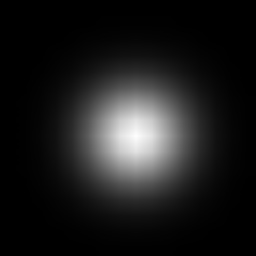

In [2]:
tensor = torch.zeros(16, 16, 3)
tensor[8, 8, 2] = 1.0
for _ in range(100):
    tensor = diffusion_step(tensor)
imshow_map_area_autoRange(tensor, target_channel=2)

In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"GPUを利用します: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("CPUを利用します")

config = CPM_config(
    size=(64, 64),  # 画像サイズ
    l_A=1.0,  # 面積エネルギー項の係数λ_A
    l_L=1.0,  # 周囲長エネルギー項の係数λ_L
    A_0=75.0,  # 目標細胞面積 A_0
    L_0=40.0,  # 目標細胞周囲長 L_0
    T=1.0,  # 温度パラメータ T
)
print(config.__dict__)

GPUを利用します: NVIDIA H100 PCIe
{'size': (64, 64), 'dim': 2, 'height': 64, 'width': 64, 'depth': 1, 'l_A': 1.0, 'l_L': 1.0, 'A_0': 75.0, 'L_0': 40.0, 'T': 1.0, 'diffusion_channels': [2], 'other_channels': 1, 'diffusion_D': [0.1], 'diffusion_percent': [1.0]}


torch.Size([64, 64, 3])
Action space shape: (484, 5)
Observation space shape: (64, 64, 3)


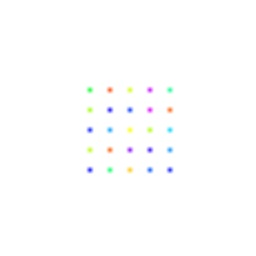

In [4]:
env = CPMDiffusionEnv(config, device=device)  # CPM環境のインスタンスを作成
env.reset()  # 環境をリセット
env.render()  # 環境を描画
env.cpm_model.map_tensor[32, 32, 2] = 1.0

In [5]:
dummy_action = torch.zeros(env.action_space.shape, device=device)  # ダミーアクションを作成
print(dummy_action.shape)

torch.Size([484, 5])


環境のステップを進める:   0%|          | 0/1000 [00:00<?, ?it/s]

/app/cpm_torch/CPMDiffusionEnv.py:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  action = torch.tensor(action, dtype=torch.float32, device=self.device)
/app/cpm_torch/CPMEnv.py:100: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  action = torch.tensor(action, dtype=torch.float32, device=self.device)
環境のステップを進める: 100%|██████████| 1000/1000 [00:01<00:00, 581.29it/s]


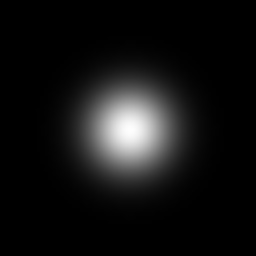

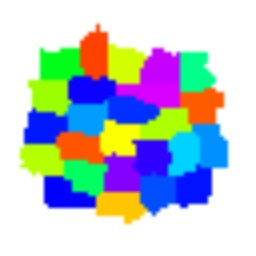

In [6]:
for _ in tqdm(range(1000), desc="環境のステップを進める"):
    env.step(dummy_action)  # ダミーアクションで環境を1ステップ進める
env.render(channel=[2])  # 環境を再描画